# Getting the dataset and giving names to columns

In [6]:
import pandas as pd

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Phenolic content',
                  'Flavonoids', 'Non-flavonoid phenols', 'Proanthocyanidins', 'Color intensity', 'Shade',
                   'Transmittancy 280/315 nm', 'Proline']

In [7]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Phenolic content,Flavonoids,Non-flavonoid phenols,Proanthocyanidins,Color intensity,Shade,Transmittancy 280/315 nm,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Splitting into features/target

In [8]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

# Splitting into train/test subsets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling - basing approaches (normalization, standardization)

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler() # 0 and 1 are default values for Min and Max, so this is "Normalizator" by default
stds = StandardScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test) # we don't fit it here. We want to utilize the same scaler as for training data,
# because doing otherwise would not make much sense. We need to assure, that data in test set (or on production) is
# processed the very same way as the data used for training.

X_train_std = stds.fit_transform(X_train)
X_test_std = stds.transform(X_test) # no fitting here - same as in the case of min-max scaler

# Comparing distributions

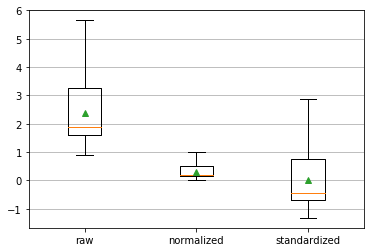

In [17]:
# just to show the differences in distribution between raw data, normalized and standardized
import matplotlib.pyplot as plt

# let's see how it works on alcohol feature
fig1, ax1 = plt.subplots()
ax1.boxplot(x = [X_train[:,1], X_train_norm[:, 1], X_train_std[:,1]], labels=["raw", "normalized", "standardized"], showmeans=True)
ax1.yaxis.grid(True)
plt.show()